In [1]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from imageio import imread
import codecs
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [90]:
terrorism_df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding = "ISO-8859-1")
column_rename = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive','natlty1_txt':'Nationality'}
terrorism_df.rename(columns=column_rename,inplace=True)
terrorism_df= terrorism_df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','suicide']]

In [91]:
#terrorism_df.isnull().sum()
#terrorism_df = terrorism_df.dropna()
terrorism_df['total_effected'] = terrorism_df['Killed'] + terrorism_df['Wounded']

In [5]:
terrorism_df.shape

(181691, 18)

In [43]:
terrorism_df.head(1).T

0
Year                                   1970
Month                                     7
Day                                       2
Country                  Dominican Republic
Region          Central America & Caribbean
city                          Santo Domingo
latitude                            18.4568
longitude                          -69.9512
AttackType                    Assassination
Killed                                    1
Wounded                                   0
Target                         Julio Guzman
Summary                                 NaN
Group                                MANO-D
Target_type     Private Citizens & Property
Weapon_type                         Unknown
Motive                                  NaN
total_effected                            1

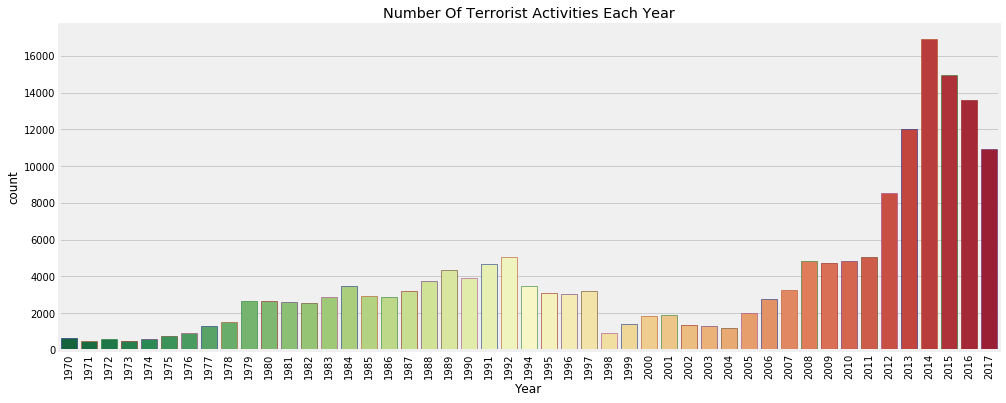

In [7]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terrorism_df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

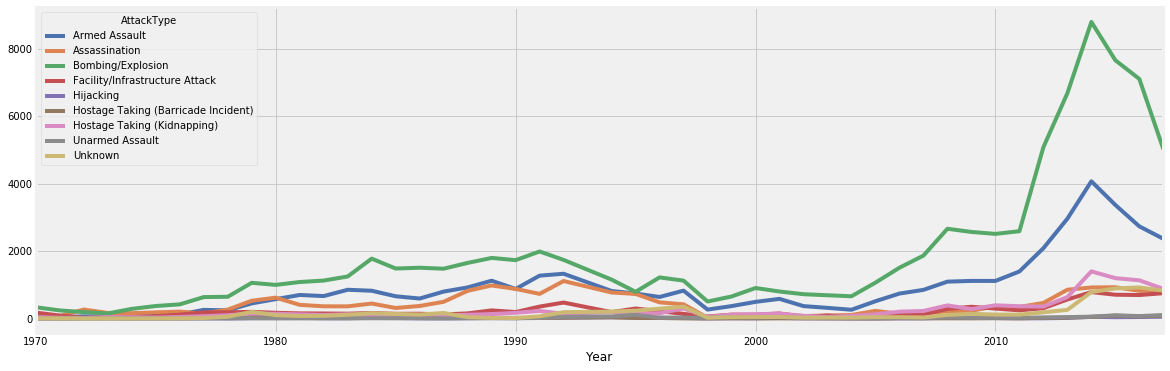

In [24]:
terror_region=pd.crosstab(terrorism_df.Year,terrorism_df.AttackType)
terror_region.plot(color=sns.color_palette('deep',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

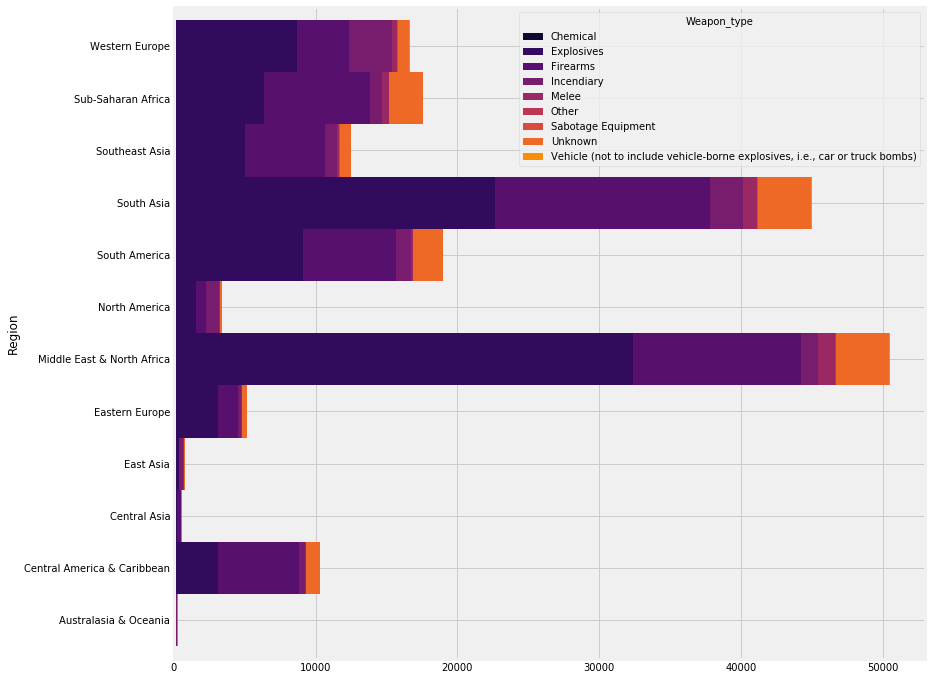

In [40]:
top_weap10=terrorism_df[terrorism_df['Weapon_type'].isin(terrorism_df['Weapon_type'].value_counts()[:9].index)]
pd.crosstab(top_weap10.Region,top_weap10.Weapon_type).plot.barh(stacked=True,width=1,color=sns.color_palette('inferno',11))
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

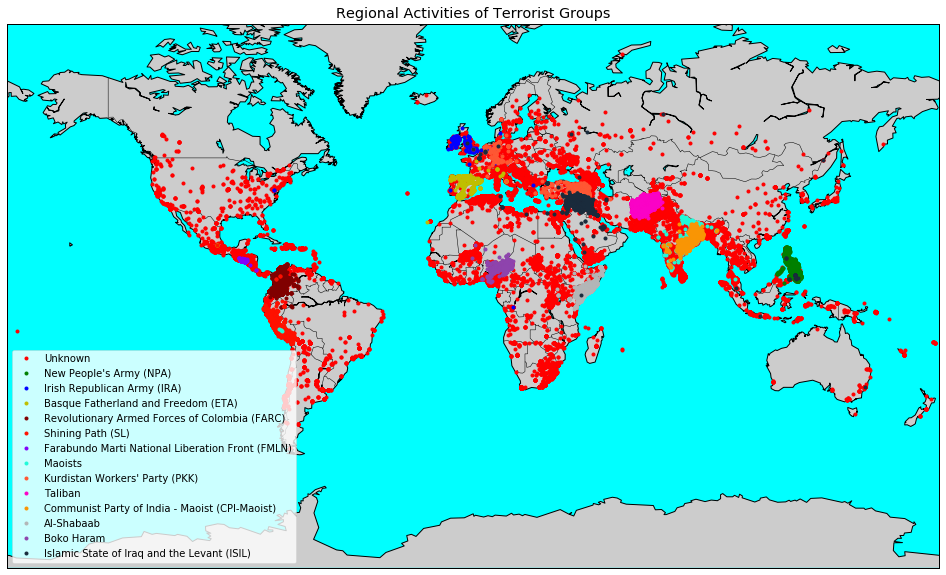

In [42]:
top_groups=terrorism_df[terrorism_df['Group'].isin(terrorism_df['Group'].value_counts()[:14].index)]
m4 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='aqua')
m4.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']
group=list(top_groups['Group'].unique())
def group_point(group,color,label):
    lat_group=list(top_groups[top_groups['Group']==group].latitude)
    long_group=list(top_groups[top_groups['Group']==group].longitude)
    x_group,y_group=m4(long_group,lat_group)
    m4.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(group,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups')
plt.show()

MovieWriter PillowWrite unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.



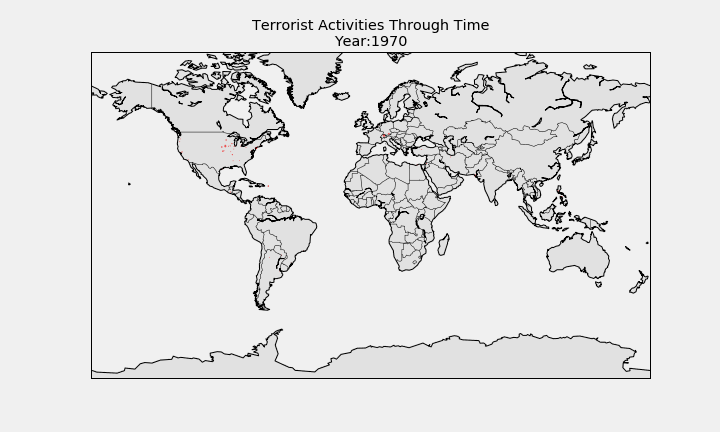

In [19]:
fig = plt.figure(figsize = (10,6))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Terrorist Activities Through Time'+'\n'+'Year:' +str(Year))
    m6 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    lat6=list(terrorism_df[terrorism_df['Year']==Year].latitude)
    long6=list(terrorism_df[terrorism_df['Year']==Year].longitude)
    x6,y6=m6(long6,lat6)
    m6.scatter(x6, y6,s=[(kill+wound)*0.1 for kill,wound in zip(terrorism_df[terrorism_df['Year']==Year].Killed,terrorism_df[terrorism_df['Year']==Year].Wounded)],color = 'r')
    m6.drawcoastlines()
    m6.drawcountries()
    m6.fillcontinents(zorder = 1,alpha=0.4)
    m6.drawmapboundary()
ani = animation.FuncAnimation(fig,animate,list(terrorism_df.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer='PillowWrite', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

In [22]:
#Basemap?

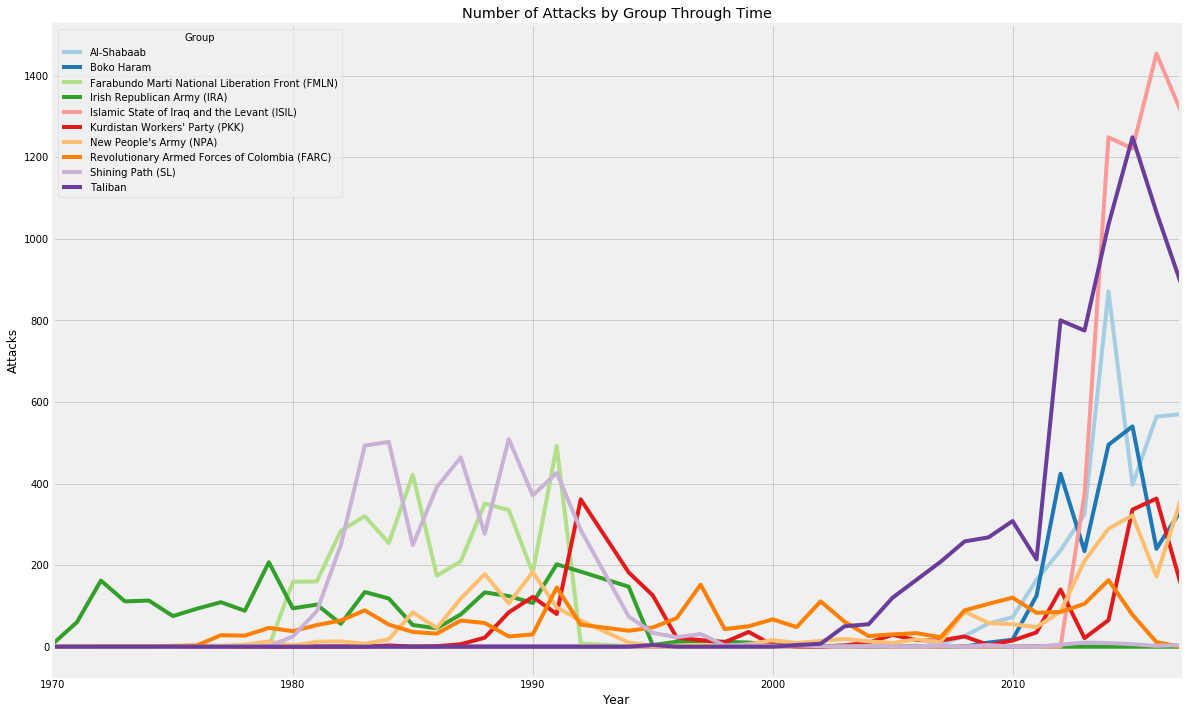

In [55]:
top_groups10=terrorism_df[terrorism_df['Group'].isin(terrorism_df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10)).set_title('Number of Attacks by Group Through Time')
fig=plt.gcf()
fig.set_size_inches(18,12)
#fig.set_title('dd')
plt.xlabel('Year')
plt.ylabel('Attacks')
plt.show() 

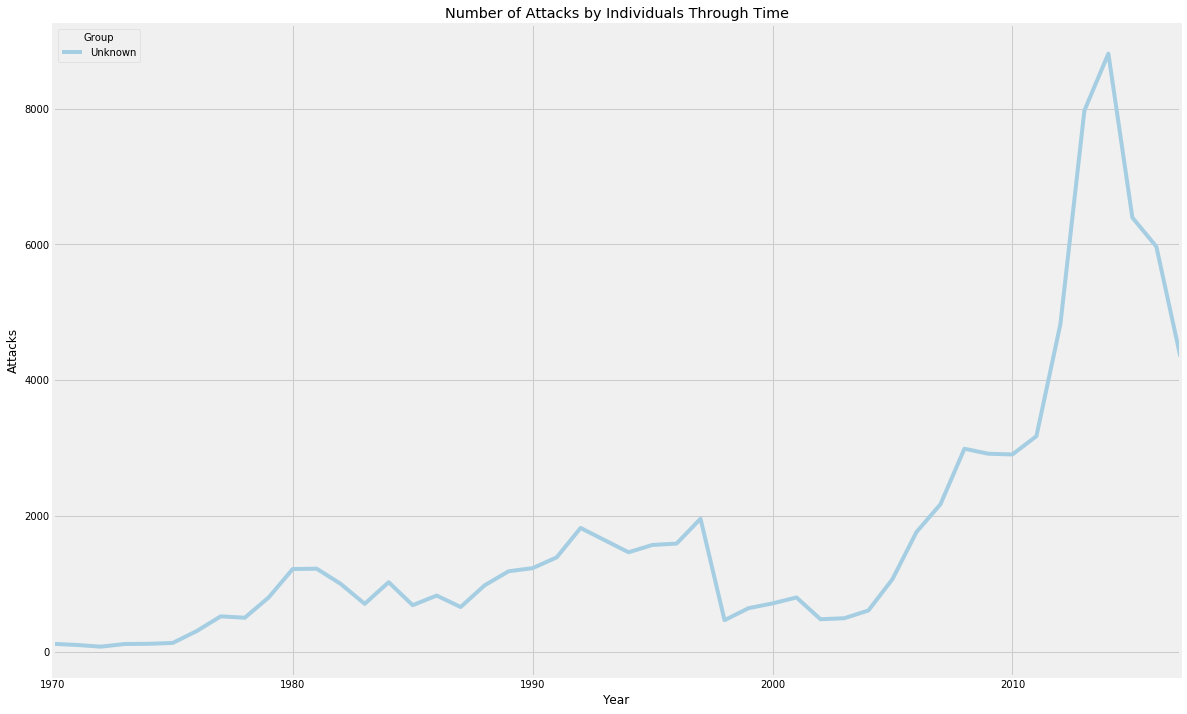

In [73]:
top_groups10=terrorism_df[terrorism_df['Group'].isin(terrorism_df['Group'].value_counts()[0:1].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10)).set_title('Number of Attacks by Individuals Through Time')
fig=plt.gcf()
fig.set_size_inches(18,12)
#fig.set_title('dd')
plt.xlabel('Year')
plt.ylabel('Attacks')
plt.show() 

In [33]:
terrorism_df['Group'].value_counts().shape[0]set_size_inches

3537

In [41]:
print('Country with Highest Terrorist Attacks:',terrorism_df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terrorism_df['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terrorism_df['Killed'].max(),'that took place in',terrorism_df.loc[terrorism_df['Killed'].idxmax()].Country)
print('Total Attacks:',len(terrorism_df))
print('Attacks between:', terrorism_df['Year'].min(),'--',terrorism_df['Year'].max())
print('Total Deaths:', terrorism_df['Killed'].sum())
print('Total Wounded:', terrorism_df['Wounded'].sum())
print('Total Casualities:', terrorism_df['total_effected'].sum())
print('Total Unique Groups',terrorism_df['Group'].value_counts().shape[0]-1)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq
Total Attacks: 181691
Attacks between: 1970 -- 2017
Total Deaths: 411868.0
Total Wounded: 523869.0
Total Casualities: 872892.0
Total Unique Groups 3536


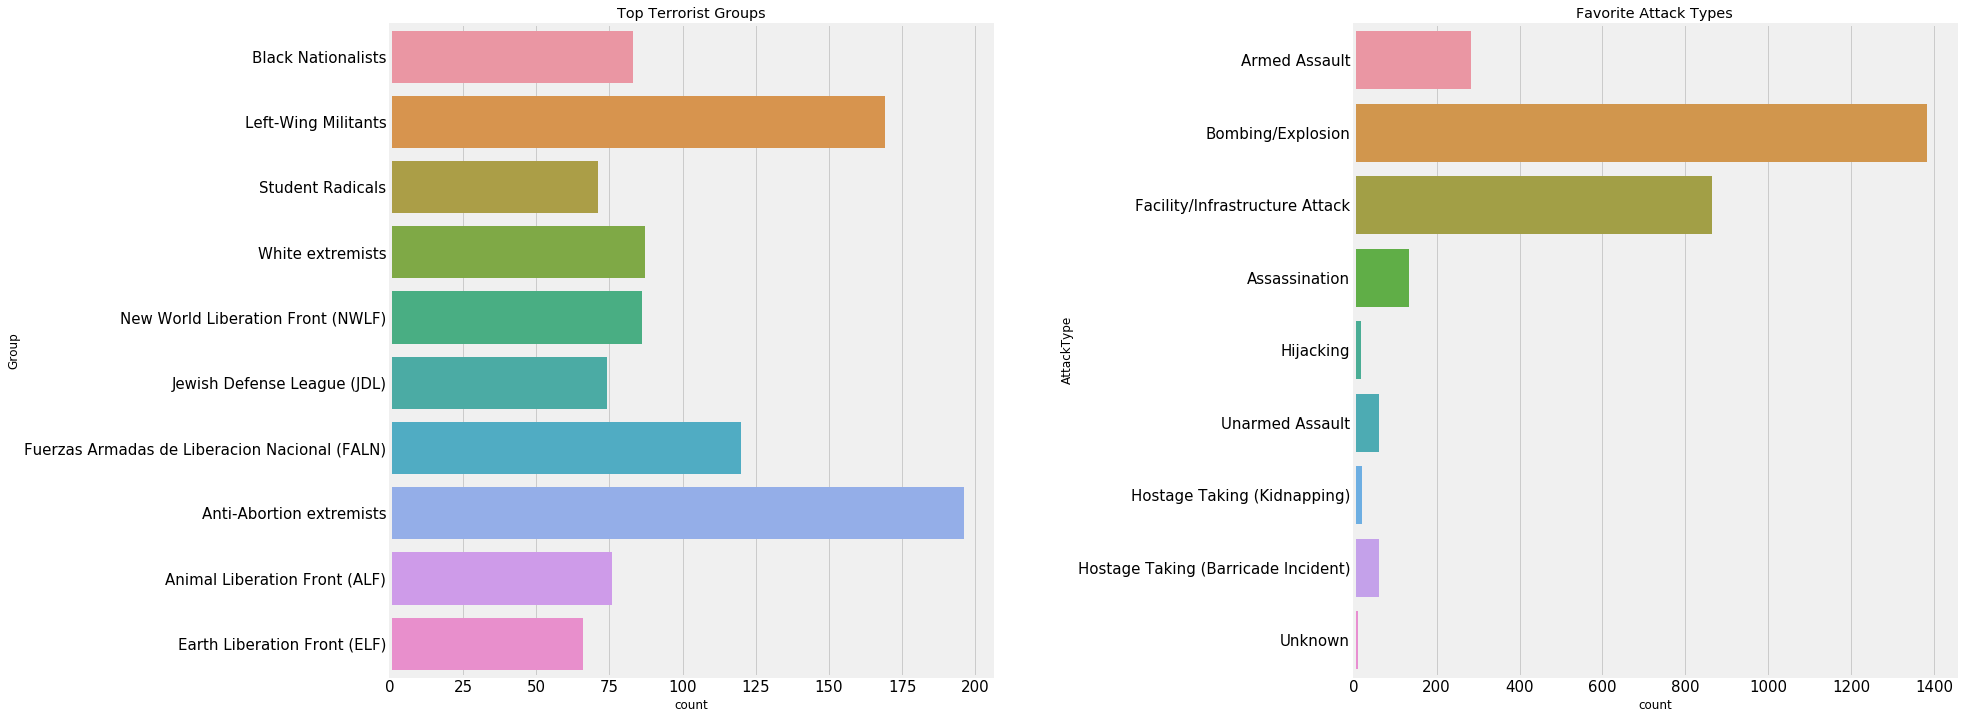

In [71]:
terror_usa=terrorism_df[terrorism_df['Country']=='United States']

#terrorism_df['Country'].value_counts()[0:20]


f,ax=plt.subplots(1,2,figsize=(25,12))
ind_groups=terror_usa['Group'].value_counts()[1:11].index
ind_groups=terror_usa[terror_usa['Group'].isin(ind_groups)]
sns.countplot(y='Group',data=ind_groups,ax=ax[0])
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='AttackType',data=terror_usa,ax=ax[1])
ax[1].set_title('Favorite Attack Types')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

In [107]:
terrorism_df.head(1).T.iloc[:,:0]

Empty DataFrame
Columns: []
Index: [Year, Month, Day, Country, Region, city, latitude, longitude, AttackType, Killed, Wounded, Target, Summary, Group, Target_type, Weapon_type, Motive, suicide, total_effected]

In [102]:
pd.DataFrame(terrorism_df['Summary'].value_counts())

Summary
09/00/2016: Sometime between September 18, 2016...      100
12/01/2016: Assailants detonated explosive devi...       80
05/29/2016: Security forces discovered and defu...       50
01/11/2016: Assailants set fire to a shop in Mu...       36
07/22/2016: Security forces discovered and defu...       36
...                                                     ...
10/18/2009: On Sunday, in Lashkar Gah, Helmand,...        1
05/23/2015: Assailants attacked Awdheegle town,...        1
04/18/2013: An explosive device detonated in fr...        1
11/23/2016: Assailants set fire to a bus in Kat...        1
11/20/2016: An explosives-laden vehicle detonat...        1

[112492 rows x 1 columns]

In [112]:
print(terrorism_df.shape)

pd.DataFrame(terrorism_df.isnull().sum()/len(terrorism_df))


(181691, 19)


0
Year            0.000000
Month           0.000000
Day             0.000000
Country         0.000000
Region          0.000000
city            0.002389
latitude        0.025076
longitude       0.025081
AttackType      0.000000
Killed          0.056761
Wounded         0.089773
Target          0.003500
Summary         0.363964
Group           0.000000
Target_type     0.000000
Weapon_type     0.000000
Motive          0.721720
suicide         0.000000
total_effected  0.092872

In [208]:
total_affect=terrorism_df.groupby(['Country'])['total_effected'].sum().reset_index()
total_affect_year=terrorism_df.groupby(['Region','Country','Year'])['total_effected'].sum().reset_index()

In [209]:
# ind_groups=
top_10=total_affect.sort_values(by=['total_effected'], ascending=False)[:10]

In [210]:
# df.groupby(['Name', 'Fruit'])[''].agg('sum')

In [211]:
total_affect_year.head(3)

Region    Country  Year  total_effected
0  Australasia & Oceania  Australia  1970             0.0
1  Australasia & Oceania  Australia  1971             0.0
2  Australasia & Oceania  Australia  1972             1.0

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [265]:
dff=total_affect_year[total_affect_year['Country'].isin(top_10['Country'])]

In [242]:
df=dff

In [214]:
#ind_groups=terror_usa[terror_usa['Group'].isin(ind_groups)]

<BarContainer object of 386 artists>

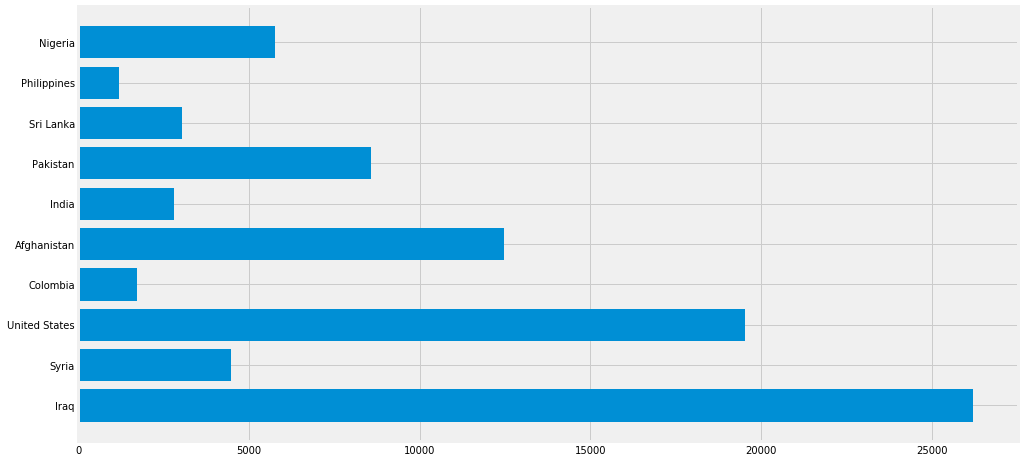

In [215]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['Country'], dff['total_effected'])

In [241]:
dff

Region  Country  Year  total_effected
1000  Middle East & North Africa     Iraq  1975             1.0
1001  Middle East & North Africa     Iraq  1976           297.0
1002  Middle East & North Africa     Iraq  1979             1.0
1003  Middle East & North Africa     Iraq  1980            14.0
1004  Middle East & North Africa     Iraq  1981             0.0
...                          ...      ...   ...             ...
2847          Sub-Saharan Africa  Nigeria  2013          1711.0
2848          Sub-Saharan Africa  Nigeria  2014          4700.0
2849          Sub-Saharan Africa  Nigeria  2015          5758.0
2850          Sub-Saharan Africa  Nigeria  2016          2403.0
2851          Sub-Saharan Africa  Nigeria  2017          2300.0

[386 rows x 4 columns]

In [217]:
current_year = 2017
dff2 = (dff[dff['Year'].eq(current_year)]
       .sort_values(by='total_effected', ascending=True)
       .head(10))
dff2

Region        Country  Year  total_effected
2167                  South Asia      Sri Lanka  2017             4.0
1748               South America       Colombia  2017           188.0
1556               North America  United States  2017          1027.0
2340              Southeast Asia    Philippines  2017          1148.0
2050                  South Asia          India  2017          1157.0
2851          Sub-Saharan Africa        Nigeria  2017          2300.0
1285  Middle East & North Africa          Syria  2017          2731.0
2130                  South Asia       Pakistan  2017          3153.0
1036  Middle East & North Africa           Iraq  2017         10999.0
1966                  South Asia    Afghanistan  2017         11698.0

In [254]:
colors = dict(zip(
    ['South Asia', 'Middle East & North Africa', 'North America', 'Southeast Asia',
     'South America', 'Sub-Saharan Africa'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f']
))
group_lk = dff.set_index('Country')['Region'].to_dict()

In [255]:
dff.head(2)

Region Country  Year  total_effected
1000  Middle East & North Africa    Iraq  1975             1.0
1001  Middle East & North Africa    Iraq  1976           297.0

In [267]:
#group_lk

In [257]:
dff['Region'].value_counts()

South Asia                    154
Middle East & North Africa     64
North America                  47
Southeast Asia                 46
South America                  45
Sub-Saharan Africa             30
Name: Region, dtype: int64

Text(1, 0.4, '2017')

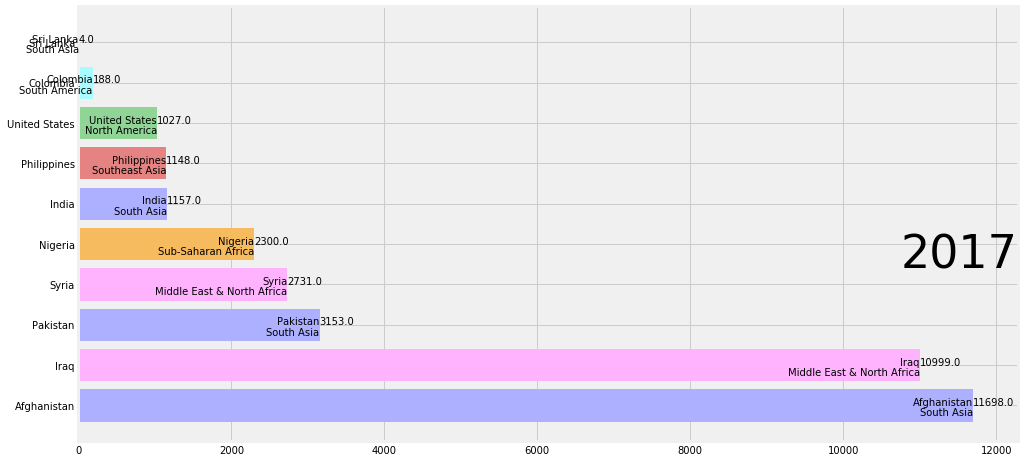

In [268]:

fig, ax = plt.subplots(figsize=(15, 8))
dff2 = dff2[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff2['Country'], dff2['total_effected'], color=[colors[group_lk[x]] for x in dff2['Country']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (total_effected, Country) in enumerate(zip(dff2['total_effected'], dff2['Country'])):
    ax.text(total_effected, i,     Country,            ha='right')  # Tokyo: name
    ax.text(total_effected, i-.25, group_lk[Country],  ha='right')  # Asia: group name
    ax.text(total_effected, i,     total_effected,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

In [275]:
    dff = df[df['Year'].eq(2017)].sort_values(by='total_effected', ascending=True)
    dff

Region        Country  Year  total_effected
2167                  South Asia      Sri Lanka  2017             4.0
1748               South America       Colombia  2017           188.0
1556               North America  United States  2017          1027.0
2340              Southeast Asia    Philippines  2017          1148.0
2050                  South Asia          India  2017          1157.0
2851          Sub-Saharan Africa        Nigeria  2017          2300.0
1285  Middle East & North Africa          Syria  2017          2731.0
2130                  South Asia       Pakistan  2017          3153.0
1036  Middle East & North Africa           Iraq  2017         10999.0
1966                  South Asia    Afghanistan  2017         11698.0

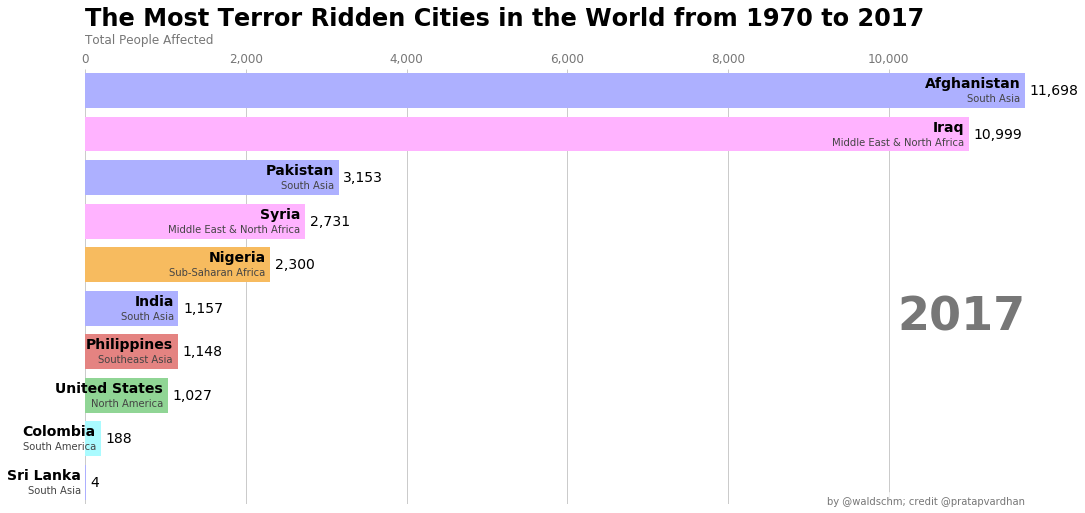

In [276]:

fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(Year):
    dff = df[df['Year'].eq(Year)].sort_values(by='total_effected', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Country'], dff['total_effected'], color=[colors[group_lk[x]] for x in dff['Country']])
    dx = dff['total_effected'].max() / 200
    for i, (total_effected, Country) in enumerate(zip(dff['total_effected'], dff['Country'])):
        ax.text(total_effected-dx, i,     Country,           size=14, weight=600, ha='right', va='bottom')
        ax.text(total_effected-dx, i-.25, group_lk[Country], size=10, color='#444444', ha='right', va='baseline')
        ax.text(total_effected+dx, i,     f'{total_effected:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, Year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Total People Affected', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.10, 'The Most Terror Ridden Cities in the World from 1970 to 2017',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @waldschm; credit @pratapvardhan', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2017)

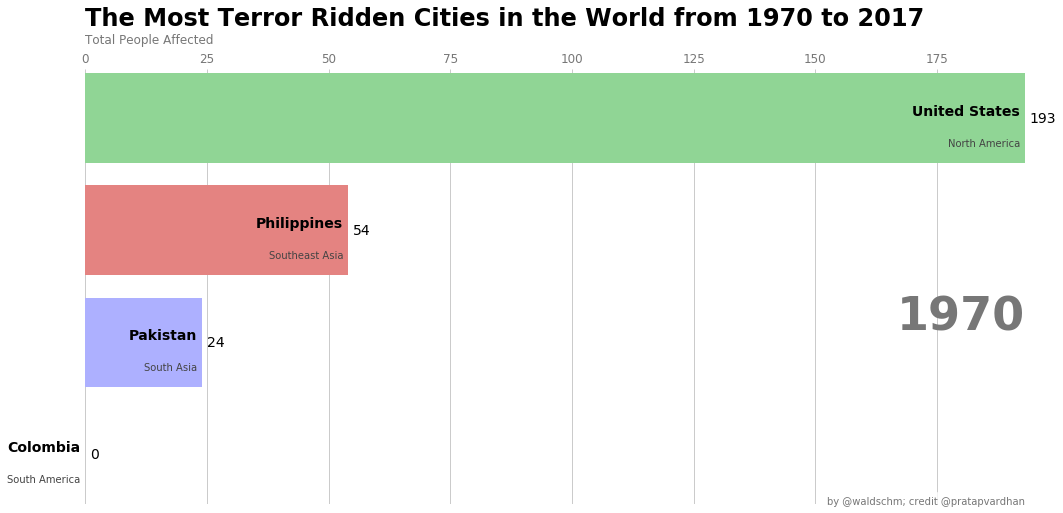

In [278]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1970, 2018))
HTML(animator.to_jshtml()) 
# or use animator.to_html5_video() or animator.save()